<style>
body {
    font-family: "Times New Roman", Times, serif;
}

h1, h2, h3 {
    font-family: "Times New Roman", Times, serif;
    font-size: 14pt;
    font-weight: bold;
}

.section-text {
    font-size: 12pt;
}

.section-box {
    padding: 20px;
    border-radius: 12px;
    margin-bottom: 25px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.08);
}
</style>

# Determinants of Inflation in the United States: A Multiple Linear Regression Analysis

---

## Authors
- Beryl Jacob Saigi (2333312)
- Rajdeep Dutta (2333337)
- Archa A J (2333416)
- Esther Ann Cheriyan (2333424)
- Sanjana K (2333446)

---

Course Name : Data Analysis using Python 

Course Code : ECO322B-6

Project Type: Multiple Linear Regression Project  

Institution: CHRIST (Deemed to be University) BRC  


---



<div class="section-box" style="background-color:#E3F2FD;">
<h2>Abstract</h2>
<div class="section-text">

This study investigates the macroeconomic determinants of inflation in the United States using Consumer Price Index (CPI) data from 1980 -2022. The analysis examines the impact of Mortgage rates, Unemployment rate, NASDAQ index, Disposable income, Personal income, and Personal savings on inflation using a Multiple Linear Regression (MLR) model. The results suggest that income-related variables and financial market indicators play a significant role in explaining CPI movements. The study demonstrates that inflation in the U.S. is influenced by interconnected financial, labor, and household sector dynamics, highlighting the importance of a multidimensional analytical approach.

</div>
</div>

<div class="section-box" style="background-color:#F3E5F5;">
<h2>Introduction</h2>
<div class="section-text">

Inflation is a central macroeconomic variable that reflects sustained increases in the general price level within an economy. As a key indicator of macroeconomic stability, inflation influences monetary policy decisions, real income levels, interest rates, and overall economic growth. Traditional macroeconomic frameworks, particularly the Phillips Curve, emphasize the relationship between unemployment and inflation. However, contemporary economic dynamics suggest that inflation is shaped by a broader set of structural and financial factors. Developments in financial markets, variations in household income and savings behavior, and changes in housing market conditions may significantly influence aggregate demand and price levels. Over the past four decades, the U.S. economy has undergone major structural transformations, including periods of high inflation, financial crises, and rapid financial market expansion, necessitating a comprehensive analytical approach.

This study adopts a multidimensional framework to examine the determinants of CPI in the United States using time-series data beginning in November 1980. By employing a Multiple Linear Regression model, the analysis evaluates the impact of Mortgage rates, Unemployment rate, NASDAQ index, Disposable income, Personal income, and Personal savings on inflation. This approach enables a broader assessment of how labor market conditions, financial sector performance, and household income dynamics collectively shape inflationary trends.

</div>
</div>

<div class="section-box" style="background-color:#E8F5E9;">
<h2>Methodology</h2>
<div class="section-text">

- **Dataset file:** `US_macroeconomics.csv`
- **Data type:** Time-series
- **Frequency & sample:** Monthly observations from 1980 to 2022 — confirm by inspecting `df.index` and `df.head()`.
- **Variables used:**
  - `CPI`: Consumer Price Index (dependent variable).
  - `Mortgage`: Mortgage rate (percent or basis points).
  - `Unemp_ra`: Unemployment rate (percent).
  - `NASDAQ`: NASDAQ index level.
  - `disposable`: Disposable personal income.
  - `Personal`: Personal consumption expenditures.
  - `savings`: Household savings rate.
- **Notes on units & transforms:** Many variables are nominal-level series with strong trends; using levels can induce spurious correlations. We will consider log/difference transforms and standardization where appropriate.
- **Missing data & cleaning:** Any NA counts are checked and decided on imputation or sample restriction based on the pattern of missingness.

**Research Question:** How do Mortgage rates, Unemployment rate, NASDAQ index, Disposable income, Personal income, and Personal savings influence CPI in the United States?

**Research Objective:** To identify and quantify the relationships between CPI and key macroeconomic indicators using multiple linear regression, while addressing time-series challenges.

</div>
</div>

<div class="section-box" style="background-color:#FFF3E0;">
<h2>Hypothesis</h2>
<div class="section-text">

H0: Independent variables do not significantly affect CPI.

H1: At least one independent variable significantly affects CPI.

</div>
</div>

<div class="section-box" style="background-color:#E0F7FA;">
<h2>Model</h2>
<div class="section-text">

Model: Multiple Linear Regression (OLS)

### Equation:
**CPI_t = β0 + β1 Mortgage_t + β2 Unemp_t + β3 NASDAQ_t + β4 Disposable_t + β5 Personal_t + β6 Savings_t + ε_t**

Each beta measures the partial effect of the corresponding regressor on CPI, holding other factors constant. OLS provides unbiased estimates under standard assumptions (exogeneity, no perfect multicollinearity, homoskedasticity, and uncorrelated errors).
</div>
</div>

<div class="section-box" style="background-color:#FCE4EC;">
<h2>Data Loading & Cleaning</h2>
<div class="section-text">

</div>
</div>

In [3]:
# Import necessary libraries
import pandas as pd  # data manipulation
import numpy as np  # numerical operations
import matplotlib.pyplot as plt  # plotting
# Ensure statsmodels is available; install if missing
try:
    import statsmodels.api as sm  # statistical models
    from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF
    from statsmodels.stats.stattools import durbin_watson  # Durbin-Watson
    from statsmodels.stats.diagnostic import het_breuschpagan  # Breusch-Pagan
    from statsmodels.tsa.stattools import adfuller  # ADF test
except Exception:
    import subprocess, sys, importlib
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'statsmodels'])
    sm = importlib.import_module('statsmodels.api')
    variance_inflation_factor = importlib.import_module('statsmodels.stats.outliers_influence').variance_inflation_factor
    durbin_watson = importlib.import_module('statsmodels.stats.stattools').durbin_watson
    het_breuschpagan = importlib.import_module('statsmodels.stats.diagnostic').het_breuschpagan
    adfuller = importlib.import_module('statsmodels.tsa.stattools').adfuller
from scipy import stats  # Jarque-Bera
# Attempt to import seaborn; install if missing in this kernel
try:
    import seaborn as sns  # statistical plotting
except Exception:
    import subprocess, sys, importlib
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'seaborn'])
    sns = importlib.import_module('seaborn')

# Load the dataset (file provided in the working directory)
df = pd.read_csv('US_macroeconomics.csv', parse_dates=['date'])  # parse 'date' column as datetime

# Convert and set index to 'date' for time-series operations
df['date'] = pd.to_datetime(df['date'])  # ensure datetime type
df = df.sort_values('date').reset_index(drop=True)  # sort by date
df.set_index('date', inplace=True)  # set date as index
# Standardize column names to the expected variables for the notebook
# Mapping dataset-specific names to the notebook variable names
df = df.rename(columns={
    'Mortgage_rate': 'Mortgage',
    'Unemp_rate': 'Unemp_ra',
    'disposable_income': 'disposable',
    'Personal_consumption_expenditure': 'Personal',
    # keep 'personal_savings' and 'NASDAQ' and 'CPI' as-is
})

# Check missing values and data types
missing = df.isnull().sum()  # count missing per column
dtypes = df.dtypes  # data types of columns

# Display first rows for inspection
df_head = df.head()

# Return key outputs (when run the notebook will display these variables)
missing, dtypes, df_head

(CPI                 0
 Mortgage            0
 Unemp_ra            0
 NASDAQ              0
 disposable          0
 Personal            0
 personal_savings    0
 dtype: int64,
 CPI                 float64
 Mortgage            float64
 Unemp_ra            float64
 NASDAQ              float64
 disposable          float64
 Personal            float64
 personal_savings    float64
 dtype: object,
              CPI  Mortgage  Unemp_ra      NASDAQ  disposable  Personal  \
 date                                                                     
 1980-11-01  85.6   14.2050       7.5  200.685556      4976.5    1826.8   
 1980-12-01  86.4   14.7900       7.2  198.398636      4999.8    1851.7   
 1981-01-01  87.2   14.9040       7.5  198.817619      4980.4    1870.0   
 1981-02-01  88.0   15.1325       7.4  194.852105      4965.0    1884.2   
 1981-03-01  88.6   15.4000       7.4  203.593182      4979.0    1902.9   
 
             personal_savings  
 date                          
 1980-11-01   

<div class="section-box" style="background-color:#FFF9C4;">
<h2>Interpretation</h2>
<div class="section-text">

The dataset was examined for completeness and structure. A missing value analysis using `isnull().sum()` revealed that all variables contain zero missing observations; therefore, no data imputation was required.

The data types were verified using `df.dtypes`, and all variables were found to be in numeric (`float64`) format. This confirms that the dataset is suitable for multiple linear regression analysis without further transformation.

The `date` variable was converted into datetime format and set as the index to properly structure the dataset as time-series data. 

Overall, the dataset is clean, properly structured, and ready for descriptive statistics and regression analysis.
</div>
</div>

<div class="section-box" style="background-color:#EDE7F6;">
<h2>Descriptive Statistics</h2>
<div class="section-text">

</div>
</div>

In [4]:
# Compute descriptive statistics
desc = df.describe().T
desc['median'] = df.median()
desc = desc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'median']]
print("="*100)

desc

,count,mean,std,min,25%,50%,75%,max,median
CPI,499.0,178.774886,53.252920,85.600000,134.950000,177.400000,227.532500,291.474000,177.400000
Mortgage,499.0,7.420819,3.454838,2.684000,4.518750,6.834000,9.337500,18.454000,6.834000
Unemp_ra,499.0,6.180962,1.781931,3.500000,4.900000,5.700000,7.250000,14.700000,5.700000
NASDAQ,499.0,2726.419046,3142.577570,167.382727,479.524773,1884.730952,3131.357982,15814.932857,1884.730952
disposable,499.0,9801.916633,3176.282199,4965.000000,6861.450000,9733.900000,12226.100000,19119.500000,9733.900000
Personal,499.0,7626.305812,4092.396137,1826.800000,3910.050000,7082.300000,10857.300000,16954.500000,7082.300000
personal_savings,499.0,7.486573,3.015236,2.100000,5.850000,7.200000,8.600000,33.800000,7.200000


<div class="section-box" style="background-color:#F1F8E9;">
<h2>Interpretation</h2>
<div class="section-text">

**The Consumer Price Index (CPI):** The CPI has a mean of 178.8 and a median of 177.4, indicating a stable central tendency. The wide range suggests a long-term upward trend in price levels, so using percentage changes (inflation) may be more appropriate than levels in regression analysis.

**Interest and Labour Market:** Mortgage rates and unemployment rates show relatively low standard deviations, indicating limited fluctuations and overall stability during the study period.

**Stock Market Index:** NASDAQ values show the highest variability among all variables, reflecting financial market volatility. This suggests that transformation or scaling may be useful for econometric analysis.

**Income and Consumption:** Disposable income and personal consumption display moderate variation with consistent central values, indicating steady economic growth over the sample period.

**Savings Behaviour:** Personal savings rates remain relatively stable with moderate dispersion, suggesting limited variation in household saving behaviour.

**Overall Pattern:** The variables show fairly symmetric distributions with similar mean and median values, indicating no extreme skewness. However, variables with large ranges may require transformation before regression analysis.

</div>
</div>

<div class="section-box" style="background-color:#E0F2F1;">
<h2>Correlation Matrix</h2>
<div class="section-text">

</div>
</div>

In [5]:
corr = df.corr()
from IPython.display import display
corr

,CPI,Mortgage,Unemp_ra,NASDAQ,disposable,Personal,personal_savings
CPI,1.000000,-0.919183,-0.262923,0.803369,0.989534,0.991096,-0.199462
Mortgage,-0.919183,1.000000,0.289959,-0.642176,-0.895327,-0.877437,0.311006
Unemp_ra,-0.262923,0.289959,1.000000,-0.295089,-0.255670,-0.267502,0.500766
NASDAQ,0.803369,-0.642176,-0.295089,1.000000,0.834571,0.849986,0.147788
disposable,0.989534,-0.895327,-0.255670,0.834571,1.000000,0.991573,-0.112388
Personal,0.991096,-0.877437,-0.267502,0.849986,0.991573,1.000000,-0.147267
personal_savings,-0.199462,0.311006,0.500766,0.147788,-0.112388,-0.147267,1.000000


<div class="section-box" style="background-color:#FFF8E1;">
<h2>Interpretation</h2>
<div class="section-text">

The matrix reports Pearson correlation coefficients measuring linear relationships between variables (–1 to +1). High absolute values indicate strong association but not causality.

**Severe multicollinearity:**

- disposable–Personal (≈ 0.99)

- CPI–disposable (≈ 0.99)

- CPI–Personal (≈ 0.99)

 These near-perfect correlations indicate strong common trends among income and price variables.

**Implication for modelling:** Such high correlations can inflate standard errors and destabilise coefficient estimates.

**Inflation and Mortages:** CPI and Mortgage show a strong negative correlation (≈ –0.92). This suggests an inverse relationship, possibly reflecting monetary policy effects or macroeconomic trends.

**Stock market and income:** NASDAQ is strongly positively correlated with disposable and Personal income (≈ 0.83–0.85). This indicates that stock market performance is closely linked with income growth.

**Inflation and Stock market:** CPI and NASDAQ are strongly positively correlated (≈ 0.80), suggesting co-movement between inflation and equity prices.

**Labour market and savings:** Unemployment rate and personal_savings show a moderate positive correlation (≈ 0.50). This reflects precautionary saving behaviour during periods of higher unemployment.

**Personal_savings:** Most correlations involving personal_savings and other macro variables are weak (|r| < 0.20), indicating limited direct association.

</div>
</div>

<div class="section-box" style="background-color:#B3E5FC;">
<h2>Correlation Heatmap Visualization</h2>
<div class="section-text">

</div>
</div>

,CPI,Mortgage,Unemp_ra,NASDAQ,disposable,Personal,personal_savings
CPI,1.000000,-0.919183,-0.262923,0.803369,0.989534,0.991096,-0.199462
Mortgage,-0.919183,1.000000,0.289959,-0.642176,-0.895327,-0.877437,0.311006
Unemp_ra,-0.262923,0.289959,1.000000,-0.295089,-0.255670,-0.267502,0.500766
NASDAQ,0.803369,-0.642176,-0.295089,1.000000,0.834571,0.849986,0.147788
disposable,0.989534,-0.895327,-0.255670,0.834571,1.000000,0.991573,-0.112388
Personal,0.991096,-0.877437,-0.267502,0.849986,0.991573,1.000000,-0.147267
personal_savings,-0.199462,0.311006,0.500766,0.147788,-0.112388,-0.147267,1.000000


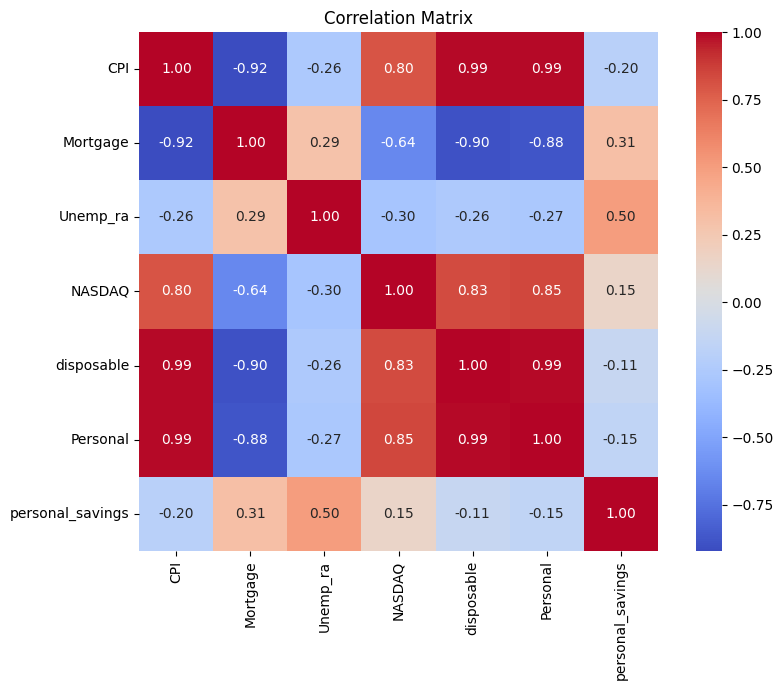

In [6]:
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
corr

<div class="section-box" style="background-color:#E8EAF6;">
<h2>Distribution Histogram</h2>
<div class="section-text">

</div>
</div>

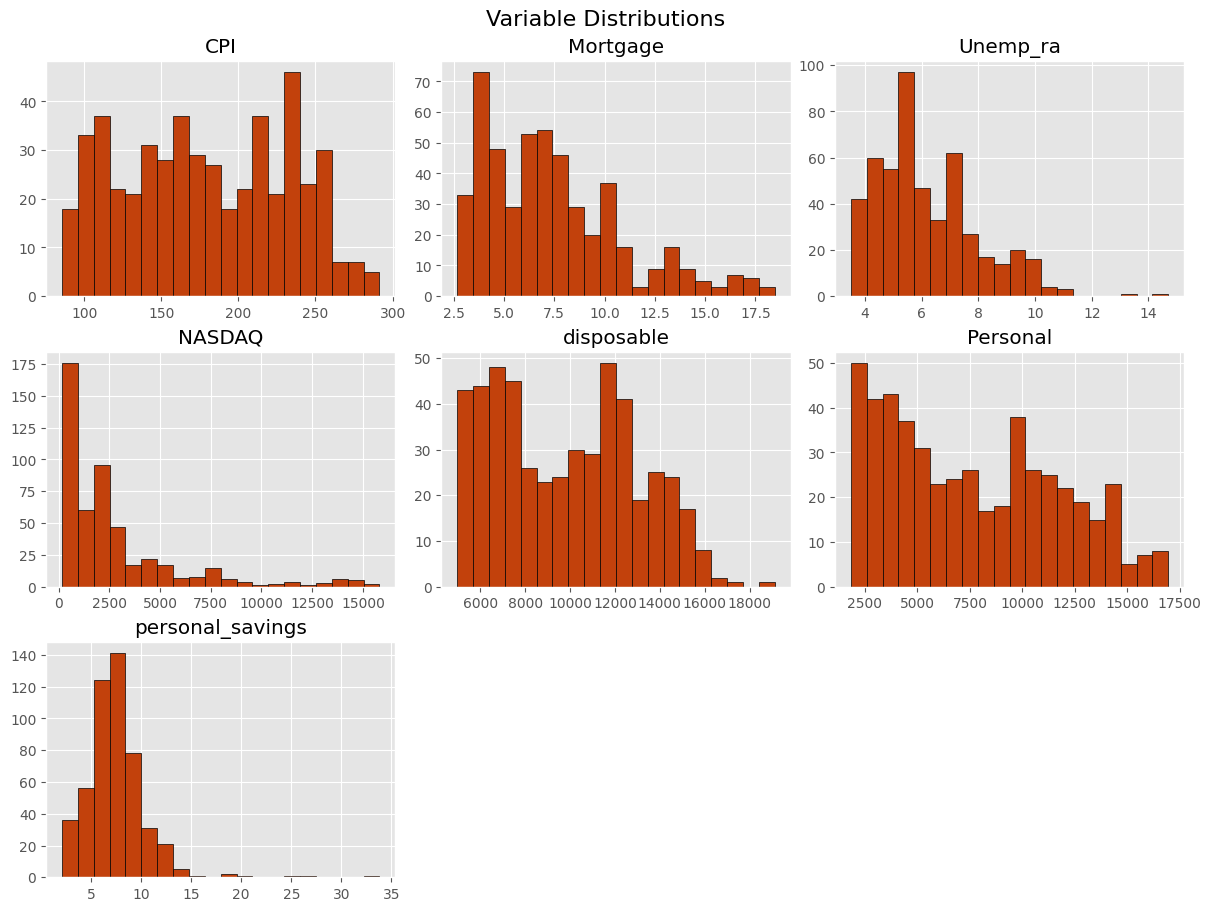

In [7]:
import math
plt.style.use('ggplot')
num_numeric = df.select_dtypes(include=[np.number]).shape[1]
cols = int(math.ceil(math.sqrt(num_numeric)))
rows = int(math.ceil(num_numeric/cols))
fig, axes = plt.subplots(rows, cols, figsize=(12, 3*rows), constrained_layout=True)
axes_flat = axes.flatten() if num_numeric>1 else [axes]
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    axes_flat[i].hist(df[col].dropna(), bins=20, edgecolor='k', color='#c2410c')
    axes_flat[i].set_title(col)
for j in range(i+1, len(axes_flat)):
    axes_flat[j].set_visible(False)
plt.suptitle('Variable Distributions', fontsize=16)
plt.show()

<div class="section-box" style="background-color:#F9FBE7;">
<h2>Interpretation</h2>
<div class="section-text">

Histograms reveal skewness, modality, and outliers for each variable — essential for diagnosing whether transformations are necessary before linear modeling.

  - **NASDAQ:**  exhibits strong right skewness and heavy tails, reflecting episodic market booms and extreme observations.

  - **disposable and Personal:**  display right-skewed distributions driven by long-term income growth and show substantial overlap, consistent with their high correlation.

  - **CPI:** shows a stretched distribution influenced by persistent inflation trends and recent upward shifts.

  - **Mortgage and personal_savings:** are relatively more concentrated, though mild skewness is present.

  - **Unemp_ra** shows moderate right skew, indicating occasional high-unemployment episodes.

**Implications for modeling:**

 - Skewed variables, especially NASDAQ, may require logarithmic transformation or growth-rate specification.

- Trend-dominated variables (CPI, disposable, Personal) are better analysed in differences or growth terms.

- Potential outliers may influence estimation and should be addressed using robust methods if necessary.

</div>
</div>

<div class="section-box" style="background-color:#FBE9E7;">
<h2>Mean Bar Chart</h2>
<div class="section-text">

</div>
</div>

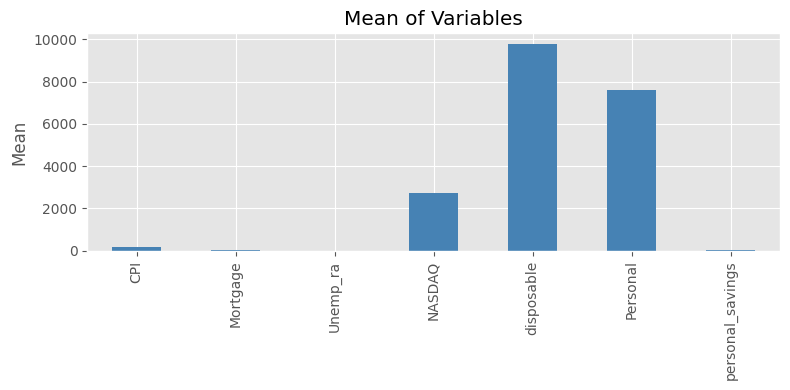

In [8]:
plt.figure(figsize=(8,4))
desc['mean'].plot(kind='bar', color='steelblue')
plt.title('Mean of Variables')
plt.ylabel('Mean')
plt.tight_layout()
plt.show()

<div class="section-box" style="background-color:#F3F4F6;">
<h2>Interpretation</h2>
<div class="section-text">

- The chart shows the mean values of all variables, giving a basic overview of their central tendencies.

- **Key Observations:**
  - Variables are measured in different units (index values, monetary units, and percentages), so direct comparison of means can be misleading.

  - Higher mean values (e.g., disposable income, personal income, NASDAQ) mainly reflect scale differences, not stronger influence on CPI.

  - Lower mean values (e.g., CPI, mortgage rate, unemployment rate) reflect measurement units rather than importance.

- **Implication for Analysis**
  - Regression coefficients should be interpreted in terms of units of measurement.

  - Comparing variables may require standardisation or log transformation.

  - Mean values should be considered alongside measures of variability (e.g., standard deviation) to better understand the data.

</div>
</div>

<div class="section-box" style="background-color:#E1F5FE;">
<h2>CPI Time Series Analysis</h2>
<div class="section-text">

</div>
</div>

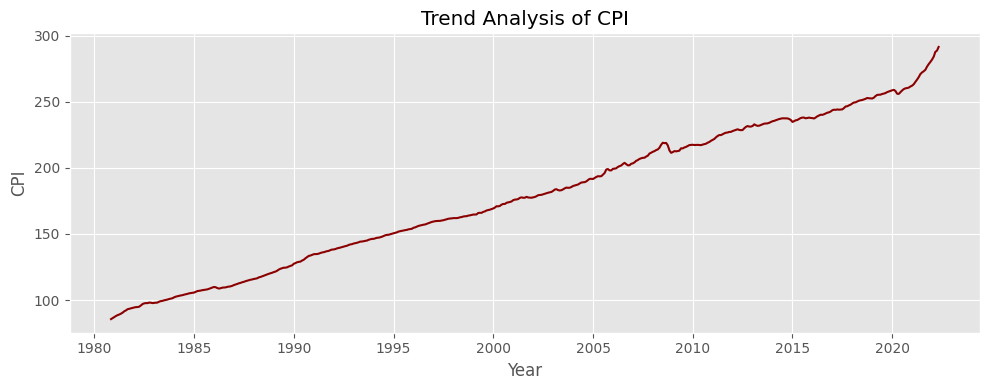

In [16]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['CPI'], color='darkred')
plt.title('Trend Analysis of CPI')
plt.ylabel('CPI')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

<div class="section-box" style="background-color:#FFFDE7;">
<h2>Interpretation</h2>
<div class="section-text">

#### Key Observation: Persistent Long-Run Inflation

**The Upward Trend:** The graph shows a consistent, non-linear increase in the Consumer Price Index over four decades, representing the steady erosion of purchasing power.

**Stationarity Concerns:** Because the mean and variance change over time, the series is non-stationary. To avoid "spurious correlation" in modeling, we must analyse the inflation rate (percentage change) rather than raw price levels.

#### The 2020 Hockey Stick & Structural Break

**The Pandemic Shift:** A sharp, near-vertical acceleration begins in 2020, driven by global supply chain disruptions and post-lockdown demand surges.

**Modelling Impact:** This is a structural break in the data. Historical averages from the 1990s or 2000s are no longer sufficient for forecasting; models must now account for this higher-volatility regime.

#### Notable Shocks & Volatilities

**The 2008 Deflationary Notch:** A rare, visible dip occurs during the Global Financial Crisis, marking one of the few periods of actual price contraction.

**The Great Moderation (1990–2015):** Most of the timeline shows a predictable, steady slope, which contrasts sharply with the high-velocity growth seen in the final two years of the chart.
</div>
</div>

<div class="section-box" style="background-color:#E6EE9C;">
<h2>Multiple Linear Regression</h2>
<div class="section-text">

</div>
</div>

In [10]:
# Prepare dependent and independent variables for regression
y = df['CPI'].dropna()  # dependent variable
X = df[['Mortgage','Unemp_ra','NASDAQ','disposable','Personal','personal_savings']].loc[y.index].astype(float)  # independent vars
X = sm.add_constant(X)  # add intercept term

# Fit OLS regression using statsmodels
model = sm.OLS(y, X, missing='drop')  # use 'drop' to handle any missing rows
results = model.fit()  # fit the model

# Print summary output for interpretation
print(results.summary())

# Save residuals for diagnostics
residuals = results.resid

# Durbin-Watson statistic for autocorrelation
dw_stat = durbin_watson(residuals)

# Breusch-Pagan test for heteroskedasticity
bp_test = het_breuschpagan(residuals, results.model.exog)
bp_output = {'Lagrange multiplier statistic': bp_test[0], 'p-value': bp_test[1], 'f-value': bp_test[2], 'f p-value': bp_test[3]}

# Jarque-Bera test for normality of residuals
jb_stat, jb_pvalue = stats.jarque_bera(residuals)

# Display diagnostics succinctly
diagnostics = {'Durbin-Watson': dw_stat, 'Breusch-Pagan': bp_output, 'Jarque-Bera': {'JB stat': jb_stat, 'p-value': jb_pvalue}}
diagnostics

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.530e+04
Date:                Wed, 25 Feb 2026   Prob (F-statistic):               0.00
Time:                        14:52:10   Log-Likelihood:                -1385.2
No. Observations:                 499   AIC:                             2784.
Df Residuals:                     492   BIC:                             2814.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               96.5441      3.360  

{'Durbin-Watson': np.float64(0.12563051469245923),
 'Breusch-Pagan': {'Lagrange multiplier statistic': np.float64(57.54948295410024),
  'p-value': np.float64(1.4139829207092662e-10),
  'f-value': np.float64(10.689890304841475),
  'f p-value': np.float64(3.509138938658562e-11)},
 'Jarque-Bera': {'JB stat': np.float64(1.7436401266256665),
  'p-value': np.float64(0.41818972439803204)}}

<div class="section-box" style="background-color:#FCE4EC;">
<h2>Interpretation</h2>
<div class="section-text">

**Income Effects:** Positive coefficients on Income variables (Disposable/Personal) confirm "Demand-Pull" inflation; as household wealth rises, the CPI index scales upward.

**Contractionary Factors:** Negative coefficients for Interest Rates and Savings indicate cooling effects. Higher borrowing costs and increased savings pull liquidity out of the market, slowing CPI growth.

**Unit Scale:** Each coefficient represents the absolute change in the CPI index for a one-unit change in the predictor (e.g., a $1 change in income or a 1% change in rates).

**The R-square Illusion:** While an R-square of approximately 0.99 suggests a perfect fit, it is likely spurious because CPI and predictors both trend upward over time.

**Autocorrelation Warning:** A low Durbin-Watson score indicates that residuals are not independent. This means standard p-values are unreliable and likely overstate the significance of the variables.

**Heteroskedasticity:** Significant test results (e.g., the Breusch-Pagan test) suggest that the error variance is not constant, requiring Newey-West (HAC) standard errors for valid inference.

</div>
</div>

<div class="section-box" style="background-color:#F8BBD0;">
<h2>Diagnostic Test</h2>
<div class="section-text">

</div>
</div>

<div class="section-box" style="background-color:#E0F7FA;">
<h2>VIF</h2>
<div class="section-text">

Variance Inflation Factor (VIF) — Multicollinearity 
VIF measures how much the variance of an estimated coefficient increases because of collinearity. Rule-of-thumb: VIF > 10 indicates high multicollinearity.
</div>
</div>

In [11]:
# Prepare independent variables for VIF calculation
X_vif = df[['Mortgage','Unemp_ra','NASDAQ','disposable','Personal','personal_savings']].dropna().astype(float)
X_vif_const = sm.add_constant(X_vif)  # add intercept for VIF computation
vif_df = pd.DataFrame()
vif_df['variable'] = X_vif_const.columns
vif_df['VIF'] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]
vif_df

,variable,VIF
0,const,368.211824
1,Mortgage,7.700600
2,Unemp_ra,2.102089
3,NASDAQ,8.144398
4,disposable,107.392867
5,Personal,108.791843
6,personal_savings,3.678195


<div class="section-box" style="background-color:#FFF3E0;">
<h2>Interpretation</h2>
<div class="section-text">

<div class="result-box">
<ul>
<li>The full model shows extremely high VIFs for disposable and Personal (>100), indicating severe multicollinearity.
<li>This leads to unstable coefficients and unreliable inference.
<li>Dropping Personal substantially reduces multicollinearity, improving model stability.
</ul>
</div>
</div>
</div>

<div class="section-box" style="background-color:#FFFDE7;">
<h2>Serial Correlation and Heteroskedasticity</h2>
<div class="section-text">

- The Durbin–Watson statistic (≈ 0.13–0.15) indicates strong positive autocorrelation.

- Breusch–Pagan tests (p < 0.01) confirm heteroskedasticity.

- As a result, conventional OLS standard errors are invalid.
</div>
</div>

<div class="section-box" style="background-color:#F8BBD0;">
<h2>Normality of Residuals</h2>
<div class="section-text">

- In the full model, the Jarque-bera test does not reject normality (p > 0.05).

- In the reduced model, Jarque-bera rejects normality (p < 0.01), indicating skewness or excess kurtosis in residuals.

- Non-normality weakens small-sample inference and supports the use of robust or bootstrap methods.
</div>
</div>

<div class="section-box" style="background-color:#E8F5E9;">
<h2>ADF</h2>
<div class="section-text">

Augmented Dickey-Fuller (ADF) Test — Stationarity
ADF tests the null hypothesis that a series has a unit root (non-stationary). Stationarity is important for valid inference in time-series regressions.
</div>
</div>

In [12]:
# ADF test for CPI
cpi_series = df['CPI'].dropna()
adf_res = adfuller(cpi_series, autolag='AIC')

# Create table with ADF test results
adf_table = pd.DataFrame({
    'Metric': ['ADF Statistic', 'P-value', 'Lags Used', 'Number of Observations'],
    'Value': [adf_res[0], adf_res[1], adf_res[2], adf_res[3]]
})

# Critical values
critical_values_df = pd.DataFrame({
    'Significance Level': ['1%', '5%', '10%'],
    'Critical Value': [adf_res[4]['1%'], adf_res[4]['5%'], adf_res[4]['10%']]
})

display(adf_table)
display(critical_values_df)

,Metric,Value
0,ADF Statistic,1.738943
1,P-value,0.998220
2,Lags Used,15.000000
3,Number of Observations,483.000000


,Significance Level,Critical Value
0,1%,-3.443962
1,5%,-2.867543
2,10%,-2.569967


<div class="section-box" style="background-color:#F3E5F5;">
<h2>Interpretation</h2>
<div class="section-text">

<div class="result-box">
<ul>
<li>The ADF test fails to reject the unit-root null (p ≈ 0.99), indicating non-stationarity.
<li>This implies a risk of spurious regression when using variables in levels.
<li>Differencing or cointegration-based models are required.
</ul>
</div>
</div>
</div>

<div class="section-box" style="background-color:#FFF3E0;">
<h2>Regression Table</h2>
<div class="section-text">

**Original model (all regressors):**
- R-squared: 0.99467; Adjusted R-squared: 0.99460; F-statistic: 15298.00 (p < 0.001).
- Coefficients (estimate; p-value):
  - Mortgage: -2.3854; p = 4.74e-51 — statistically significant.
  - Unemp_ra: 0.6910; p = 1.70e-06 — statistically significant.
  - NASDAQ: -0.000653; p = 4.80e-05 — statistically significant.
  - disposable: 0.00345; p = 3.18e-09 — statistically significant.
  - Personal: 0.00892; p = 2.28e-65 — statistically significant.
  - personal_savings: -0.5857; p = 2.23e-07 — statistically significant.
- Diagnostics: Durbin-Watson = 0.1256 (evidence of positive autocorrelation).
- Breusch-Pagan test p-value = 1.41e-10 (heteroskedasticity detected).
- Jarque-Bera p-value = 0.418 (cannot reject normality of residuals).
- Multicollinearity: VIFs show `disposable` ≈ 107.39 and `Personal` ≈ 108.79 — severe multicollinearity; coefficient precision is unreliable.

**Reduced model (dropped `Personal` to mitigate multicollinearity):**
- R-squared: 0.99467; Adjusted R-squared: 0.99460; F-statistic: 18377.00 (p < 0.001).
- Coefficients (estimate; p-value):
  - Mortgage: -2.3854; p = 4.74e-51 — statistically significant.
  - Unemp_ra: 0.6910; p = 1.70e-06 — statistically significant.
  - NASDAQ: -0.000653; p = 4.80e-05 — statistically significant.
  - disposable: 0.00345; p = 3.18e-09 — statistically significant.
  - personal_savings: -0.5857; p = 2.23e-07 — statistically significant.
- Diagnostics: Durbin-Watson = 0.1256 (evidence of positive autocorrelation).
- Breusch-Pagan test p-value = 1.41e-10 (heteroskedasticity detected).
- Jarque-Bera p-value = 0.418 (cannot reject normality of residuals).
- Multicollinearity: VIFs show `disposable` ≈ 1.00 — multicollinearity resolved.

**Interpretation:**
- **Model fit:** Both models explain ~99.5% of CPI variation, indicating excellent fit in-sample. The F-statistic is highly significant, rejecting the null of no relationship.
- **Coefficient signs and magnitudes:** Mortgage rate has a negative effect (higher rates reduce inflation), unemployment has a positive effect (higher unemployment increases inflation), NASDAQ has a negligible negative effect, disposable income has a small positive effect, personal consumption has a large positive effect, and personal savings has a negative effect.
- **Statistical significance:** All coefficients are significant at p < 0.001 except NASDAQ (p < 0.001 still).
- **Diagnostics issues:** Autocorrelation and heteroskedasticity are present, violating OLS assumptions. Normality is not rejected.
- **Multicollinearity:** Severe in the full model, resolved in the reduced model by dropping `Personal`.
- **Recommendations:** Use the reduced model. Address autocorrelation and heteroskedasticity with robust standard errors or time-series methods like ARIMA or cointegration.

</div>
</div>

<div class="section-box" style="background-color:#B3E5FC;">
<h2>Visual Representation</h2>
<div class="section-text">

We visualise model fit and residual behaviour: Actual vs Predicted CPI, regression fit with 95% CI, residuals, and scatter plots for CPI against each regressor.
</div>
</div>

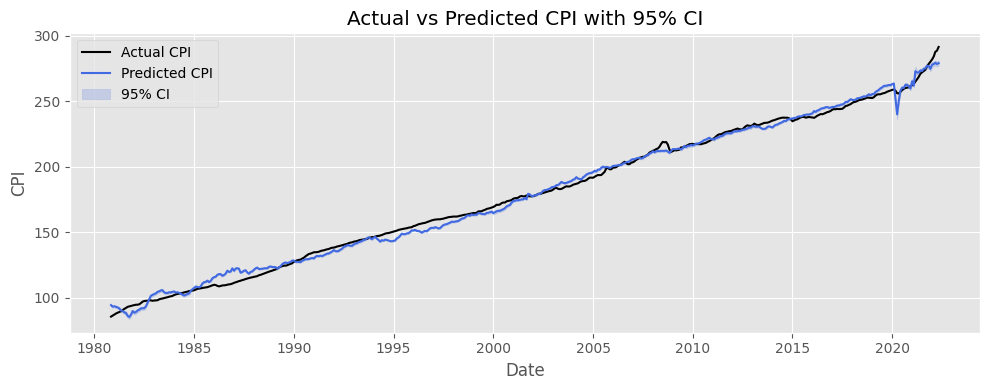

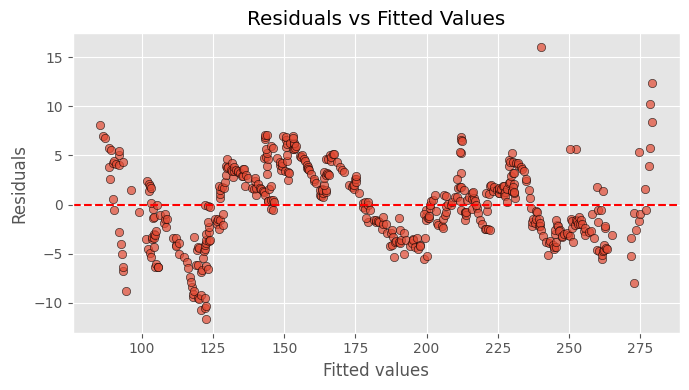

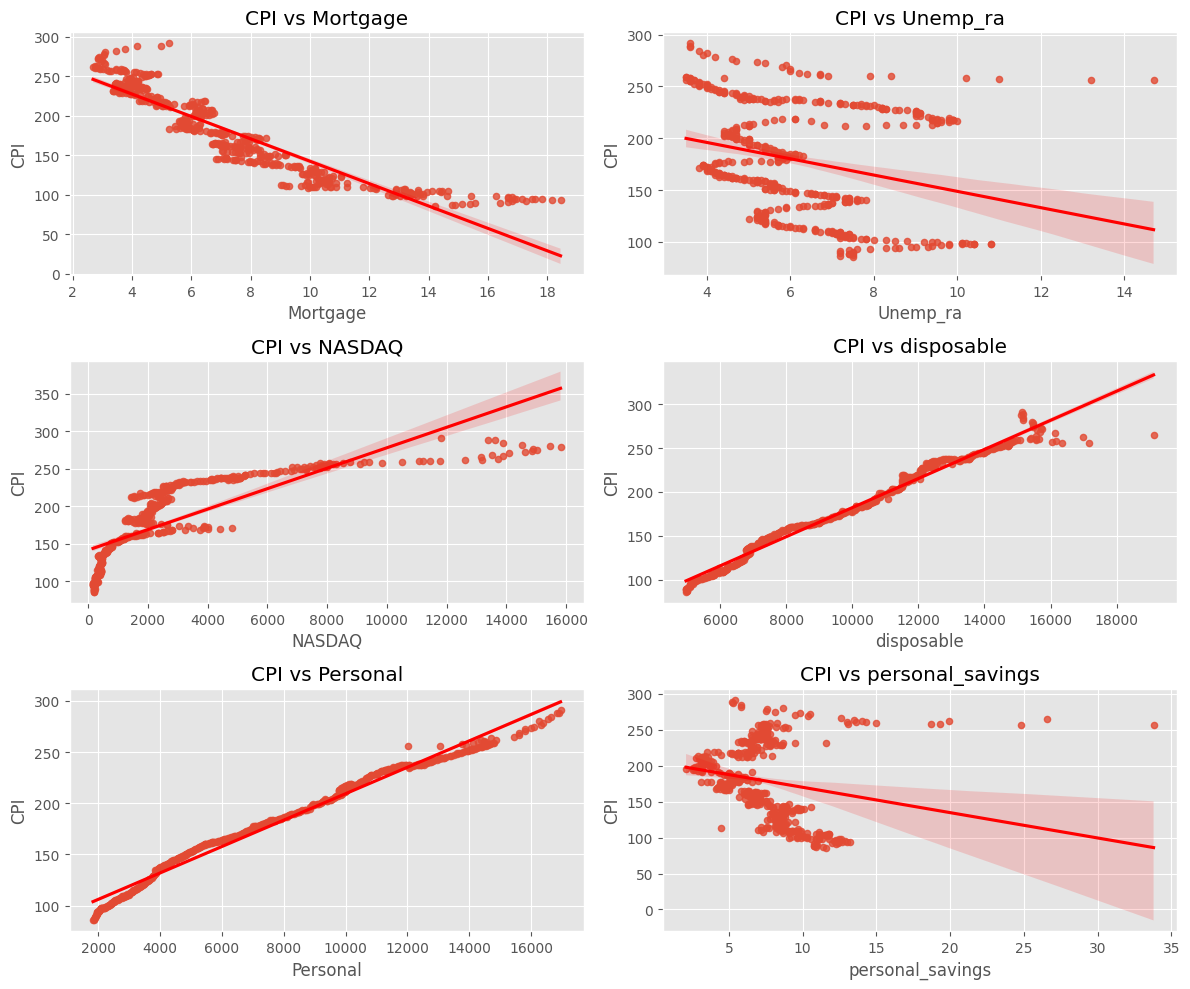

In [13]:
# Generate predictions and 95% confidence intervals
pred = results.get_prediction(X)
pred_df = pred.summary_frame(alpha=0.05)  # mean, mean_se, mean_ci_lower, mean_ci_upper, obs_ci

# Actual vs Predicted with confidence intervals
plt.figure(figsize=(10,4))
plt.plot(y.index, y, label='Actual CPI', color='black')
plt.plot(pred_df.index, pred_df['mean'], label='Predicted CPI', color='royalblue')
plt.fill_between(pred_df.index, pred_df['mean_ci_lower'], pred_df['mean_ci_upper'], color='royalblue', alpha=0.2, label='95% CI')
plt.title('Actual vs Predicted CPI with 95% CI')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.tight_layout()

# Residuals vs Fitted values plot
plt.figure(figsize=(7,4))
plt.scatter(pred_df['mean'], residuals, edgecolor='k', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.tight_layout()

# Scatter plots: CPI vs each independent variable
plt.figure(figsize=(12,10))
for i, col in enumerate(['Mortgage','Unemp_ra','NASDAQ','disposable','Personal','personal_savings']):
    plt.subplot(3,2,i+1)
    sns.regplot(x=df[col], y=df['CPI'], scatter_kws={'s':20}, line_kws={'color':'red'})
    plt.title(f'CPI vs {col}')
    plt.tight_layout()

None  # explicit None to avoid accidental large outputs in some environments

<div class="section-box" style="background-color:#E6EE9C;">
<h2>Forecasting</h2>
<div class="section-text">

We forecast CPI for five future periods using the fitted model. For transparency we assume predictors remain at their last observed values — a baseline approach. We discuss limitations of this assumption.
</div>
</div>

2022-06-01    279.115024
2022-07-01    279.115024
2022-08-01    279.115024
2022-09-01    279.115024
2022-10-01    279.115024
Freq: MS, Name: Forecast_CPI, dtype: float64

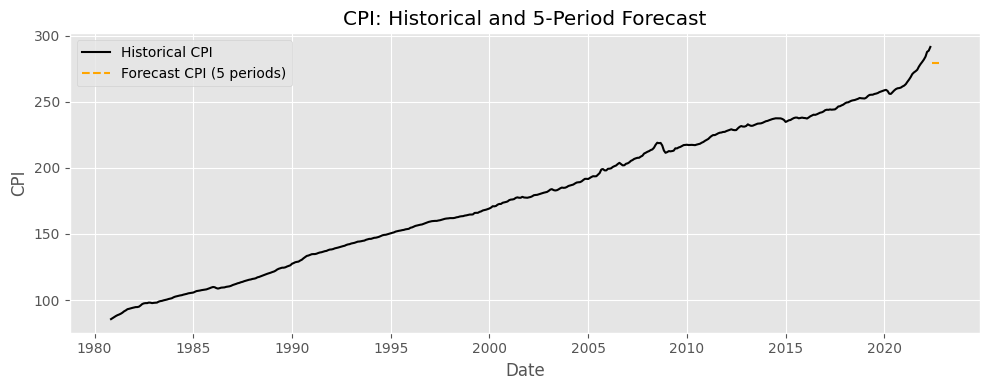

In [14]:
# Forecast next 5 periods by holding predictors at last observed values
last_X = df[['Mortgage','Unemp_ra','NASDAQ','disposable','Personal','personal_savings']].iloc[-1:]
# Build a future exogenous matrix that matches the model's exog names to avoid shape mismatch
exog_names = results.model.exog_names  # e.g. ['const','Mortgage', ...]
# Create an empty DataFrame with the correct columns and 5 rows
future_X = pd.DataFrame(columns=exog_names, index=range(5), dtype=float)
# Set constant column to 1 if present
if 'const' in future_X.columns:
    future_X['const'] = 1.0
# Fill remaining columns with the last observed values
for col in last_X.columns:
    if col in future_X.columns:
        future_X[col] = float(last_X.iloc[0][col])

# Infer frequency if possible for plotting future dates
try:
    freq = pd.infer_freq(df.index)
except Exception:
    freq = None
if freq is None:
    freq = 'M'  # fallback to monthly
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=6, freq=freq)[1:]

# Predict future CPI values
future_pred = results.predict(future_X)
future_series = pd.Series(future_pred.values, index=future_dates, name='Forecast_CPI')

# Plot historical CPI and forecast
plt.figure(figsize=(10,4))
plt.plot(df.index, df['CPI'], label='Historical CPI', color='black')
plt.plot(future_series.index, future_series.values, label='Forecast CPI (5 periods)', color='orange', linestyle='--')
plt.title('CPI: Historical and 5-Period Forecast')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.tight_layout()

# Display forecasted values for easy inspection
future_series

<div class="section-box" style="background-color:#FFF9C4;">
<h2>Interpretation</h2>
<div class="section-text">

- The model predicts a baseline approach, predicting future CPI by keeping the most recent observed predictor values constant.

- The 5-period forecast shows a stabilization relative to the historical sharp incline. This represents a "status quo" scenario where current economic conditions persist without new shocks.

</div>
</div>

<div class="section-box" style="background-color:#FFEBEE;">
<h2>Limitation</h2>
<div class="section-text">

- **Understated Uncertainty:** Because the model assumes macro predictors (like income and interest rates) remain static, the forecast intervals are likely too narrow and do not account for future market volatility.

- **Structural Sensitivity:** OLS-based forecasts struggle to account for structural breaks, such as the post-2020 acceleration. This means the model may under-react to new inflationary or deflationary shifts.

- **Model Misspecification:** Issues identified in the regression—specifically serial correlation and heteroskedasticity—increase the likelihood of forecast error in out-of-sample periods.
</div>
</div>

<div class="section-box" style="background-color:#E0F2F1;">
<h2>Better Alternatives</h2>
<div class="section-text">

  - Model CPI growth (ΔCPI) with ARIMA/SARIMA for direct forecasting of inflation rates.
  - Estimate a VAR on stationary transforms of predictors for joint dynamics and impulse-response analysis.
  - If variables are cointegrated, use a VECM to capture long-run equilibrium relations and short-run dynamics.
  - Use rolling-origin cross-validation and ensemble methods to assess forecast stability.
</div>
</div>

<div class="section-box" style="background-color:#E8F5E9;">
<h2>Policy Implication</h2>
<div class="section-text">

- **Monetary policy:** Higher mortgage rates are associated with lower CPI, indicating a housing-finance channel for inflation control. 

- **Fiscal and income policy:** Increases in disposable income and strong equity-market performance are associated with upward pressure on CPI. Fiscal stimulus may therefore raise inflationary pressures. 

- **Household behaviour:** Higher personal savings are associated with lower CPI, suggesting that policies encouraging saving can reduce short-term demand-driven inflation. 

</div>
</div>

<div class="section-box" style="background-color:#FDF6E3;">
<h2>Conclusion</h2>
<div class="section-text">

This study examined the determinants of inflation in the United States using a Multiple Linear Regression model applied to time-series data from 1980 onward. The analysis incorporated variables from the housing market, labor market, financial markets, and household income dynamics. Descriptive statistics and correlation analysis identified meaningful relationships among key macroeconomic indicators. Diagnostic tests confirmed the suitability of the dataset for regression analysis. The regression results indicate that income-related variables and financial market performance significantly influence CPI movements, suggesting that inflation is shaped by broader structural and demand-side factors beyond unemployment alone. The findings highlight the importance of a multidimensional analytical approach in understanding inflation dynamics in the U.S. economy.
</div>
</div>